In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from datetime import datetime,time
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing 
import statsmodels.api as smf

In [3]:
coca=pd.read_excel("C:\\Users\\Admin\\Downloads\\CocaCola_Sales_Rawdata.xlsx")
coca.isnull().sum()

Quarter    0
Sales      0
dtype: int64

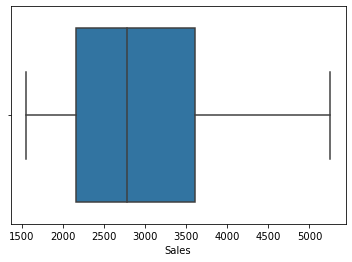

In [4]:
sns.boxplot("Sales",data=coca)

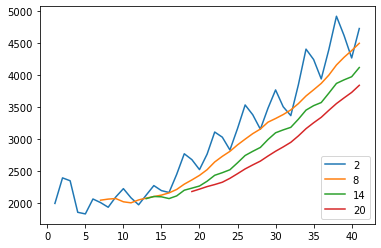

In [5]:
for i in range(2,24,6):
    coca["Sales"].rolling(i).mean().plot(label=str(i))
    plt.legend(loc=4)

<ipython-input-7-47d13abf41a0>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  seasonal_dec=smf.tsa.seasonal_decompose(coca["Sales"],freq=3)


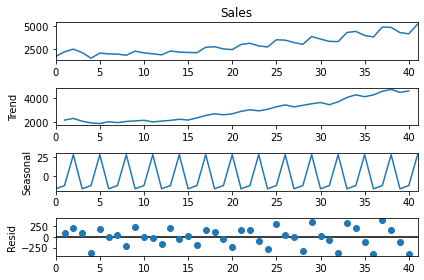

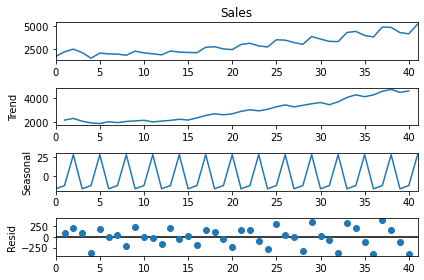

In [7]:
seasonal_dec=smf.tsa.seasonal_decompose(coca["Sales"],freq=3)
seasonal_dec.plot()

In [8]:
train=coca.head(38)
test=coca.tail(4)
test=test.set_index(np.arange(1,5))

In [9]:
def MAPE(pred,org):
    temp=np.abs((pred-org))*100/org
    return np.mean(temp)

In [17]:
Exp=SimpleExpSmoothing(train["Sales"]).fit()
Exp_pred=Exp.predict(start=test.index[0],end=test.index[-1])
Exp_mape=MAPE(Exp_pred,test.Sales)
Exp_mape

54.414821223251174

In [18]:
hw=Holt(train["Sales"]).fit()
hw_pred=hw.predict(start=test.index[0],end=test.index[-1])
hw_mape=MAPE(hw_pred,test.Sales)
hw_mape

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:743: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warn("Optimization failed to converge. Check mle_retvals.",


55.07764049968618

In [19]:
Exp_add_add=ExponentialSmoothing(train["Sales"],damped=True,seasonal="add",seasonal_periods=4,trend="add").fit()
Exp_add_add_pred=Exp_add_add.predict(start=test.index[0],end=test.index[-1])
Exp_add_add_Mape=MAPE(Exp_add_add_pred,test.Sales)
Exp_add_add_Mape

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:743: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warn("Optimization failed to converge. Check mle_retvals.",


52.19797031415747

In [20]:
Exp_mul_add=ExponentialSmoothing(train["Sales"],damped=True,seasonal="mul",seasonal_periods=4,trend="add").fit()
Exp_mul_add_pred=Exp_mul_add.predict(start=test.index[0],end=test.index[-1])
Exp_mul_add_mape=MAPE(Exp_mul_add_pred,test.Sales)
Exp_mul_add_mape

53.29971898025438

In [14]:
hwe_model_add_add = ExponentialSmoothing(coca["Sales"],seasonal="add",trend="add",seasonal_periods=12).fit()

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:743: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warn("Optimization failed to converge. Check mle_retvals.",


In [15]:
hwe_model_add_add.forecast(10)

42    4944.448446
43    4760.813873
44    4794.873611
45    5679.596175
46    5708.223284
47    5275.591794
48    5156.160832
49    6126.057105
50    5998.837135
51    5520.533456
dtype: float64

In [16]:
Table={"Model":pd.Series(["Exp_mape","hw_mape","Exp_add_add_Mape","Exp_mul_add_mape"]),"MAPE VAlUES":pd.Series([Exp_mape,hw_mape,Exp_add_add_Mape,Exp_mul_add_mape])}
Table=pd.DataFrame(Table) 

In [21]:
Table

,Model,MAPE VAlUES
0,Exp_mape,54.414821
1,hw_mape,55.077640
2,Exp_add_add_Mape,52.197970
3,Exp_mul_add_mape,53.299719
